<a href="https://colab.research.google.com/github/rodrigoddc/airbnb-porto-analysis/blob/main/Airbnb_Porto_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
by [sigmoidal.ai](https://sigmoidal.ai)
<br></br>
***Rodrigo Delfino de Carvalho***
___
# Airbnb data analysis for the city of ***Porto, Portugal***

<img alt="Background vector created by Sky and Glass - www.freepik.com/" src="https://img.freepik.com/free-vector/porto-portugal-skyline-with-panorama-white-background-vector-illustration-business-travel-tourism-concept-with-modern-old-buildings-vector-presentation-banner-website_596401-4.jpg?w=826">

[Airbnb](https://www.airbnb.com/) is already considered to be the **biggest hotel company nowadays**, even though it **does'nt have any hotels!**

Connecting people who want to travel (and stay) with hosts who want to rent their properties, Airbnb provides an innovative platform to make this hosting possible and easy.

By the end of 2018, the Startup founded 10 years ago had already **hosted more than 300 million** people around the world, challenging traditional hotel chains.

One of the initiatives of the [Inside Airbnb](http://insideairbnb.com/get-the-data.html)project is to provide the public website data available for some of the main cities in the world. Through the portal is possible to download a large amount of data for various analyses.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**In this *notebook*, we will analyze the data for the city of Porto, Portugal, and see what insights can be discoverd from this raw data source.** 

# Getting the data


In [33]:
from typing import Tuple

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

df = pd.read_csv("http://data.insideairbnb.com/portugal/norte/porto/2021-12-08/visualisations/listings.csv")

# Data analysis



## Data dictionary
Navigate to:

http://insideairbnb.com/porto/?neighbourhood=&filterEntireHomes=false&filterHighlyAvailable=false&filterRecentReviews=false&filterMultiListings=false

At the top menu click at "Data" button, at the dropdown will appear a button "Data dictionary" that will lead to a Google Sheets where could be found the following data description:

* `id` - Airbnb's unique identifier for the listing
* `name` - name of the listing
* `host_id` - Airbnb's unique identifier for the host/user
* `host_name` - Name of the host. Usually just the first name(s).
* `neighbourhood_group` - district from where the listing belongs
* `neighbourhood` - district name.
* `latitude` - Uses the World Geodetic System (WGS84) projection for latitude.
* `longitude` - Uses the World Geodetic System (WGS84) projection for longitude.
* `room_type` - There are four types of places: entire place, private rooms, hotel rooms, and shared rooms.
* `price` - daily price in local currency.
* `minimum_nights` - number of minimum nights to reserve
* `number_of_reviews` - reviews number that the listing has
* `last_review` - date of the last review
* `reviews_per_month` - amount of reviews por mês
* `calculated_host_listings_count` - number of listings the host has in the current scrape, in the city/region geography.
* `availability_365` - The availability of the listing x days in the future as determined by the calendar.

## First _dataset_ entries
Before begin an analysis, observe the dataset paying attention at the first 5 rows.

In [34]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,41339,Porto city flat near the sea,180050,Paula,PORTO,Lordelo do Ouro e Massarelos,41.15010,-8.66035,Entire home/apt,75,5,17,2018-09-28,0.16,1,113,0,29049/AL
1,55111,Fontielas Houses |Floor1 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17481,-8.35362,Entire home/apt,66,3,14,2019-09-07,0.18,3,0,0,7563/AL
2,73828,Fontielas Houses |Floor0 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17449,-8.35426,Entire home/apt,66,3,8,2019-07-22,0.10,3,0,0,7563/AL
3,86388,A Formosa - a nest made for two,185209,João,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.14918,-8.60922,Private room,20,2,148,2021-11-23,1.14,7,310,12,6995/AL
4,87873,Oporto Apartment Triplex,480980,Paula,PORTO,Bonfim,41.15786,-8.60427,Entire home/apt,69,3,192,2021-11-27,1.65,3,347,9,634/AL


## Variables and types
Watch the data amount in this dataset, as well as the attributes (variables) and the number of entries that this source has and it's types

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10748 entries, 0 to 10747
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10748 non-null  int64  
 1   name                            10748 non-null  object 
 2   host_id                         10748 non-null  int64  
 3   host_name                       10744 non-null  object 
 4   neighbourhood_group             10748 non-null  object 
 5   neighbourhood                   10748 non-null  object 
 6   latitude                        10748 non-null  float64
 7   longitude                       10748 non-null  float64
 8   room_type                       10748 non-null  object 
 9   price                           10748 non-null  int64  
 10  minimum_nights                  10748 non-null  int64  
 11  number_of_reviews               10748 non-null  int64  
 12  last_review                     

## Missing values
Descending the variables and observing it's percentage of missing values could be arguid that there are some significant missing values



In [36]:
df_missing = df.isnull().sum() / df.shape[0]
df_missing.sort_values(ascending=False) * 100

reviews_per_month                 14.979531
last_review                       14.979531
license                            8.224786
host_name                          0.037216
minimum_nights                     0.000000
number_of_reviews_ltm              0.000000
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
id                                 0.000000
name                               0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
price                              0.000000
dtype: float64

As could be seen the variables `reviews_per_month`, `last_reviews` and `license` have about 15%, 15% and 8% of missing values respectively.

## Histograms, variables distribution

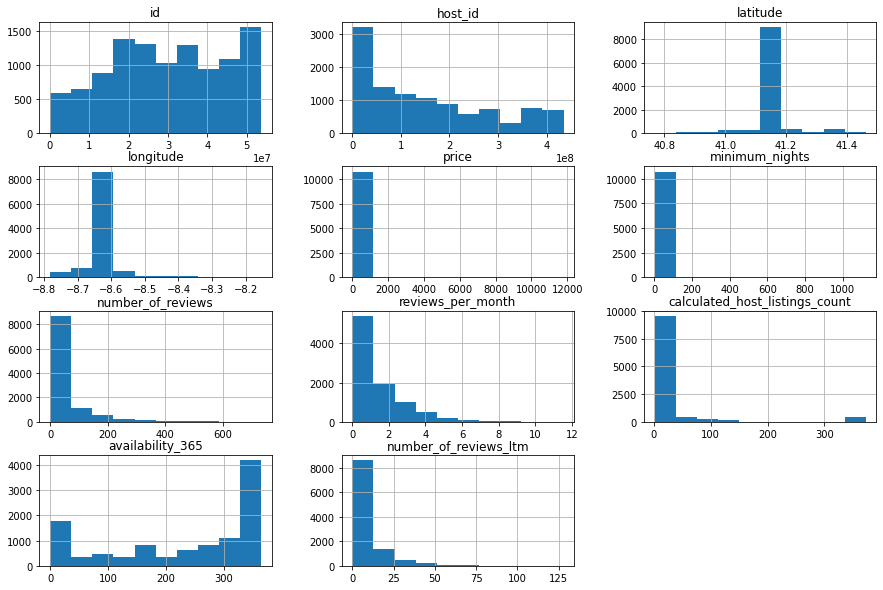

In [37]:
df.hist(figsize=(15,10));

## Outliers
By the distribution of the histogram, it is possible to verify evidence of the presence of *outliers*. Take for example the variables `price`, `minimum_nights` and `calculated_host_listings_count`.

The values do not follow a regular distribution, and they distort the entire graphical representation. To confirm, there are two quick ways that help detect *outliers*. Are they:

* Statistical summary via `describe()` method
* Plot `boxplots` to the variable.

#### Exploratory analysis 
Through observation we'll try to eliminate ***outliers*** by analyzing the data distribution 

##### The method `describe()`

First things first, it's checked the information provided by the method `describe()` from ***dataframe***:

In [38]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,10748.000000,10748.000000,10748.000000,9138.000000,10748.000000,10748.000000
mean,87.531076,3.631094,43.919892,1.330390,23.991626,232.135746
std,331.672321,24.201148,72.499948,1.394058,69.258962,132.982646
min,9.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.000000,1.000000,2.000000,0.280000,1.000000,125.000000
50%,59.000000,2.000000,13.000000,0.850000,4.000000,284.000000
75%,83.000000,2.000000,53.000000,1.970000,11.000000,349.000000
max,11799.000000,1124.000000,733.000000,11.540000,373.000000,365.000000


Looking at the statistical summary above, we can confirm some hypotheses such as:

* The `price` variable has 75% of entries below 83.000000 but its maximum value is 11799.000000, which shows a very large difference. We can then assume that at least this property with the highest value is a clear outlier
* There `minimum_nights` also has a peak well above 75% of entries, with a value of 1124 days!
* Looking at the `calculated_host_listings_count` variable we can also see this big discrepancy where 75% of the entries are below 11, but the highest value is 373. 

##### Boxplots
Now let's deepen our analysis by checking our insights by looking at the ***boxplots*** for these same variables:
<br></br>
Boxplot of variable `price`

In [39]:
def measure_entries_and_his_percentage(df, edge: int):
    print(f"{len(df[df.price > edge])} entries")
    print(f"{(len(df[df.price > 455]) / df.shape[0])*100:.2f}% of total")

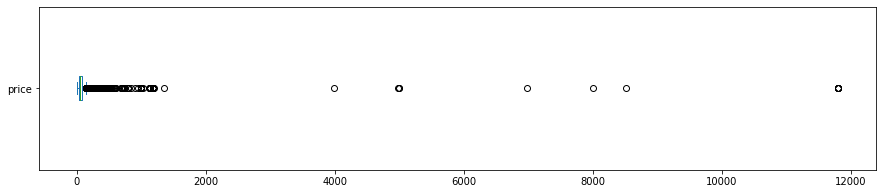

In [40]:
df.price.plot(kind="box", vert=False, figsize=(15, 3))

Let's measure the entries of properties with values above 450: 

In [41]:
measure_entries_and_his_percentage(df, edge=455)

104 entries
0.97% of total


In [42]:
measure_entries_and_his_percentage(df, edge=220)

350 entries
0.97% of total


It is interesting to note that by cutting down on properties with a price greater than 220, they represent only approximately 3.2% of the entries 

Boxplot of `minimum_nights`

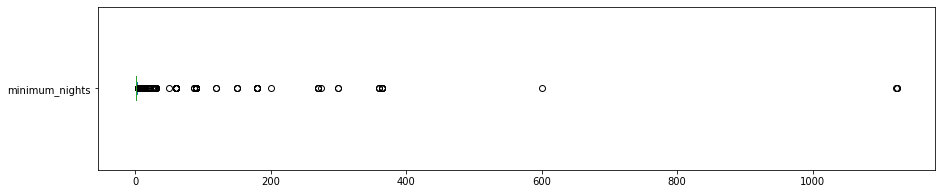

In [43]:
df.minimum_nights.plot(kind="box", vert=False, figsize=(15, 3))

Entries with a minimum number of nights longer than 30 days:

In [44]:
measure_entries_and_his_percentage(df, edge=30)

9258 entries
0.97% of total


This value is very interesting because performing the cut in 29 days the number of entries represents only 1.28%

In [45]:
measure_entries_and_his_percentage(df, edge=29)

9635 entries
0.97% of total


Same analysis with a cut to 7 days, the number of entries is only 2% higher

In [46]:
measure_entries_and_his_percentage(df, edge=7)

10748 entries
0.97% of total


Boxplot of variable `calculated_host_listings_count`

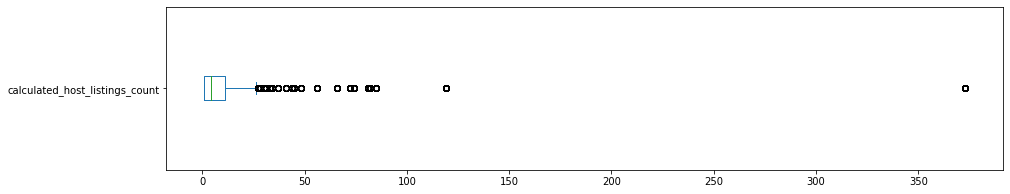

In [47]:
df.calculated_host_listings_count.plot(kind="box", vert=False, figsize=(15, 3))

In [48]:
measure_entries_and_his_percentage(df, edge=90)

2209 entries
0.97% of total


Trimming this variable demonstrates the elimination of many entries even with a low range, consequently eliminating a lot of information from `price` and `minimum_nights`. However, for the purpose of our analysis and the nature of this data, I do not believe it is interesting to proceed with eliminating entries with this strategy. 

##### Histograms whitout ***outliers***

Since we've identified *outliers* in the `price` and `minimum_nights` variables, let's now clear their *DataFrame* and re-plot the histogram. 

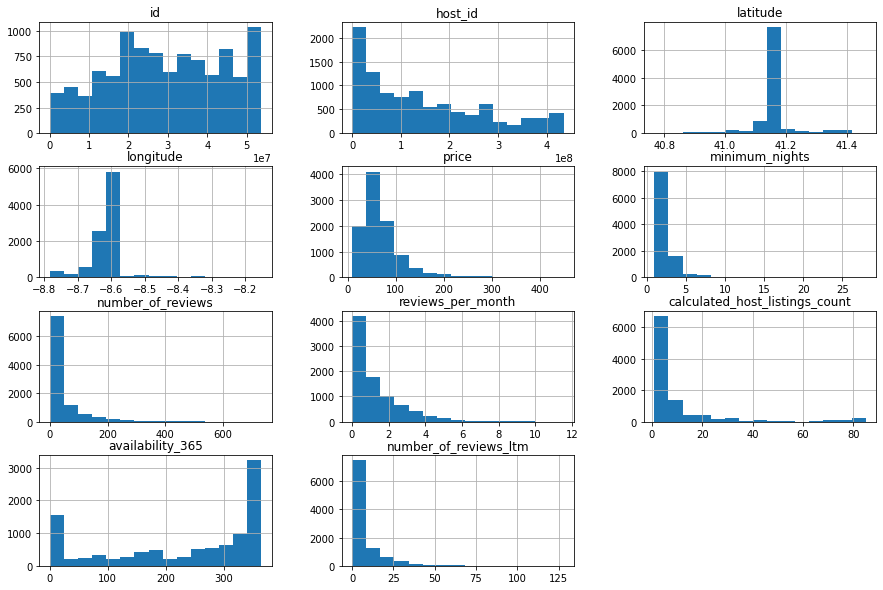

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,10032.000000,10032.000000,10032.000000,8543.000000,10032.000000,10032.000000
mean,71.296750,2.216906,43.200159,1.287507,10.320774,230.716308
std,51.278904,2.303206,72.489769,1.377342,17.507188,132.944387
min,9.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,42.000000,1.000000,2.000000,0.270000,1.000000,121.000000
50%,60.000000,2.000000,13.000000,0.800000,4.000000,283.000000
75%,82.000000,2.000000,51.000000,1.880000,9.000000,349.000000
max,450.000000,28.000000,733.000000,11.540000,85.000000,365.000000


In [49]:
df_clean = df.copy()
df_clean = df_clean.drop(df_clean[df_clean.price > 455].index)
df_clean = df_clean.drop(df_clean[df_clean.minimum_nights > 29].index)
df_clean = df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 90].index)

df_clean.hist(bins=15, figsize=(15,10))
plt.show()
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

##### ***Boxplots*** whitout ***outliers***
Taking advantage of the clean ***dataframe***, let's look at the ***boxplots*** again

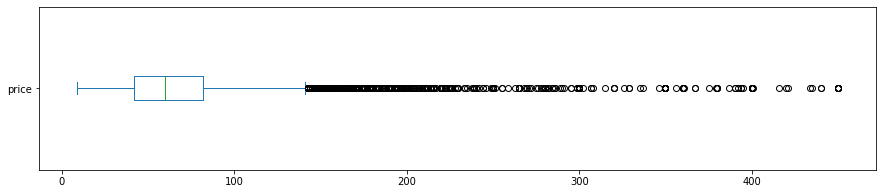

In [50]:
df_clean.price.plot(kind="box", vert=False, figsize=(15, 3))

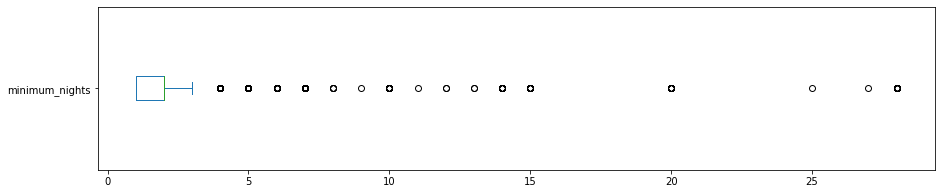

In [51]:
df_clean.minimum_nights.plot(kind="box", vert=False, figsize=(15, 3))

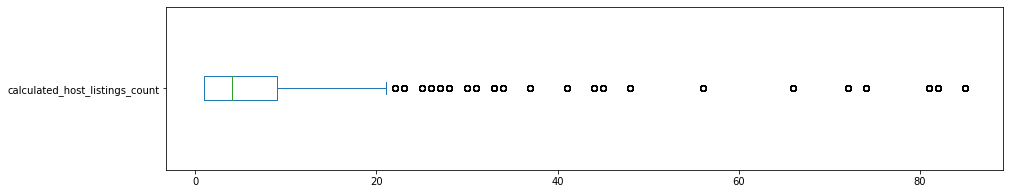

In [52]:
df_clean.calculated_host_listings_count.plot(kind="box", vert=False, figsize=(15, 3))

In [53]:
df_missing = (df_clean.isnull().sum() / df.shape[0]) * 100
df_missing.sort_values(ascending=False)

reviews_per_month                 13.853740
last_review                       13.853740
license                            7.982881
host_name                          0.037216
minimum_nights                     0.000000
number_of_reviews_ltm              0.000000
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
id                                 0.000000
name                               0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
price                              0.000000
dtype: float64

### IQR Score

Looking at the histograms and boxplots created without ***outliers*** through the cross-section of the exploratory evaluation by experimentation that we did, the dataset distribution may still not look satisfactory. Then we will still apply the removal of ***outliers*** through the IQR Score rule.

The IQR being the subtraction of the Third Quartile (75%) by the First Quartile (25%)

**IQR = Q3 - Q1**

From the IQR we obtain the lower and upper limits of the series through the calculation:

**lower limit = Q1 - 1.5 * IQR**

**upper limit = Q3 + 1.5 * IQR**

Distribution example: 

<img alt="Grafico exemplificando o IQR, seus limites e distribuição dos dados" src="https://www.researchgate.net/publication/340969321/figure/fig2/AS:885273386811393@1588077031036/Interquartile-range-IQR-projection-on-a-normally-distributed-density-The-median-of-IQR.jpg"/>

In [54]:
IQR_LIMIT_CONST = 1.5
IQR_EXTREME_LIMIT_CONST = 3

def calc_iqr_limits(df_target: pd.DataFrame, column_name: str) -> Tuple:
    q1 = df_target[column_name].quantile(0.25)
    q3 = df_target[column_name].quantile(0.75)
    iqr = q3-q1
    inf_limit = q1 - (IQR_LIMIT_CONST * iqr)
    sup_limit = q3 + (IQR_LIMIT_CONST * iqr)
    return iqr, inf_limit, sup_limit


def calc_iqr_extreme_limits(df_target: pd.DataFrame, column_name: str) -> Tuple:
    q1 = df_target[column_name].quantile(0.25)
    q3 = df_target[column_name].quantile(0.75)
    iqr = q3-q1
    inf_limit = q1 - (IQR_EXTREME_LIMIT_CONST * iqr)
    sup_limit = q3 + (IQR_EXTREME_LIMIT_CONST * iqr)
    return iqr, inf_limit, sup_limit

#### Variable `price`

Limit

In [55]:
iqr, inf_limit, sup_limit = calc_iqr_limits(df_target=df, column_name='price')

print('IQR `price`: ', iqr)
print('lower limit: ', inf_limit)
print('upper limit: ', sup_limit)

IQR `price`:  43.0
lower limit:  -24.5
upper limit:  147.5


Extreme limit

In [56]:
iqr, inf_limit, sup_limit = calc_iqr_extreme_limits(df_target=df, column_name='price')

print('IQR `price`: ', iqr)
print('lower extreme limit: ', inf_limit)
print('upper extreme limit: ', sup_limit)

IQR `price`:  43.0
lower extreme limit:  -89.0
upper extreme limit:  212.0


#### Variable `minimum_nights`

In [57]:
iqr, inf_limit, sup_limit = calc_iqr_limits(df_target=df, column_name='minimum_nights')

print('IQR `minimum_nights`: ', iqr)
print('lower limit: ', inf_limit)
print('upper limit: ', sup_limit)

IQR `minimum_nights`:  1.0
lower limit:  -0.5
upper limit:  3.5


In [64]:
iqr, inf_limit, sup_limit = calc_iqr_extreme_limits(df_target=df, column_name='minimum_nights')

print('IQR `minimum_nights`: ', iqr)
print('lower extreme limit: ', inf_limit)
print('upper extreme limit: ', sup_limit)

IQR `minimum_nights`:  1.0
lower extreme limit:  -2.0
upper extreme limit:  5.0


It's seems reasonable to use the dataset filtering outliers of the variable `price` using IQR limit, and to the variable `minimum_nigths` using IQR extreme limit

#### Histograms and boxplots

Now let's evaluate how the histograms and boxplots were after the outliers were cut using the IQR Score technique

In [189]:
df_clean_iqr = df.copy()
df_clean_iqr = df_clean_iqr.drop(df_clean_iqr[df_clean_iqr.price > 147].index)
df_clean_iqr = df_clean_iqr.drop(df_clean_iqr[df_clean_iqr.minimum_nights > 5].index)

print(f'Datasset size before cleaning: {df.shape}')
print(f'Datasset size after cleaning: {df_clean_iqr.shape}')

Datasset size before cleaning: (10748, 18)
Datasset size after cleaning: (9503, 18)


##### Histograms

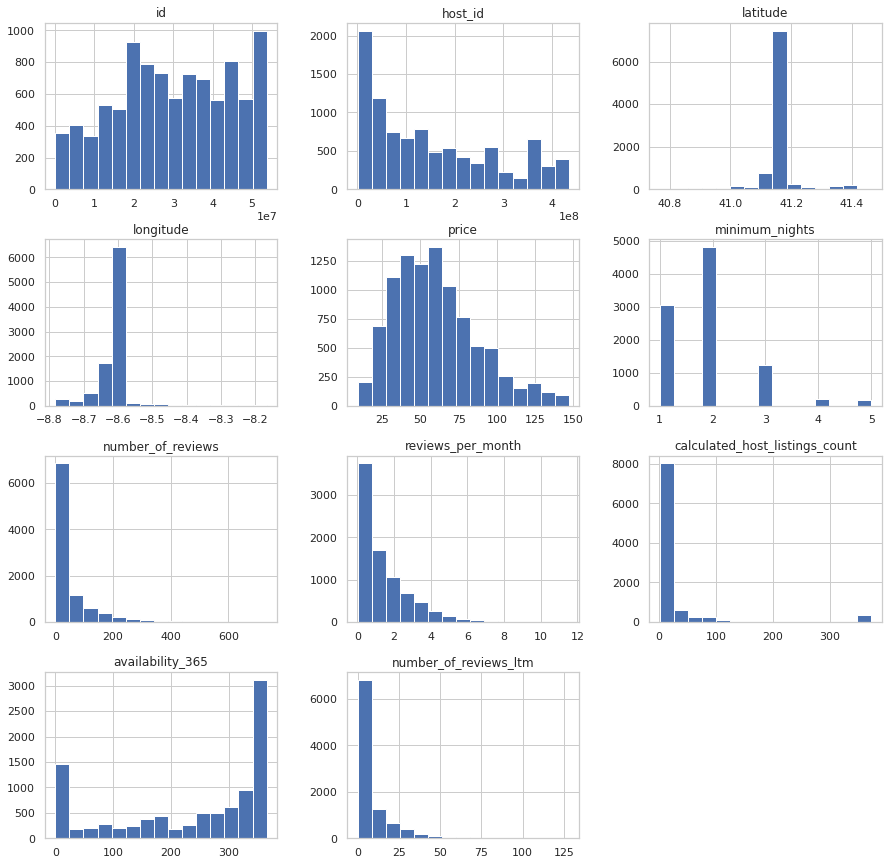

In [190]:
df_clean_iqr.hist(bins=15, figsize=(15,15))
plt.show()

In [191]:
df_clean[
    [
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',     
    'calculated_host_listings_count',
    'availability_365'
    ]
].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,10032.000000,10032.000000,10032.000000,8543.000000,10032.000000,10032.000000
mean,71.296750,2.216906,43.200159,1.287507,10.320774,230.716308
std,51.278904,2.303206,72.489769,1.377342,17.507188,132.944387
min,9.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,42.000000,1.000000,2.000000,0.270000,1.000000,121.000000
50%,60.000000,2.000000,13.000000,0.800000,4.000000,283.000000
75%,82.000000,2.000000,51.000000,1.880000,9.000000,349.000000
max,450.000000,28.000000,733.000000,11.540000,85.000000,365.000000


##### Boxplots

###### Variable Price

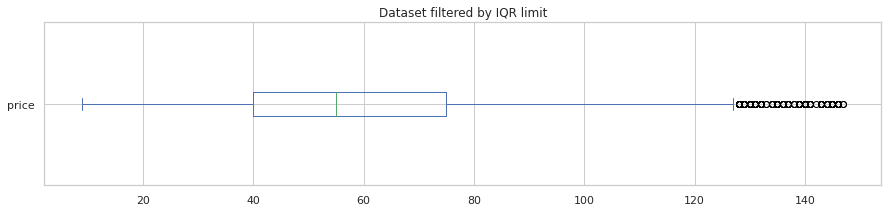

In [192]:
df_clean_iqr.price.plot(
    kind="box",
    title="Dataset filtered by IQR limit",
    vert=False,
    figsize=(15, 3)
)
plt.show()

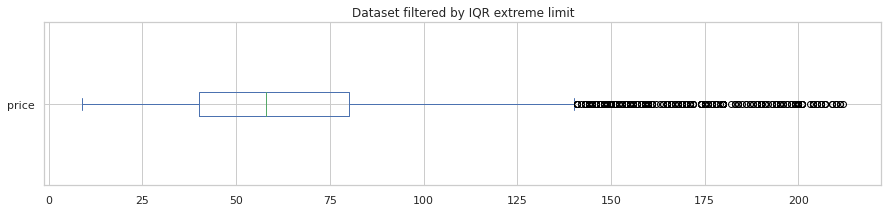

In [193]:
df_clean_iqr_extreme.price.plot(
    kind="box",
    title="Dataset filtered by IQR extreme limit",
    vert=False,
    figsize=(15, 3)
)
plt.show()

###### Variable minimum_nigths

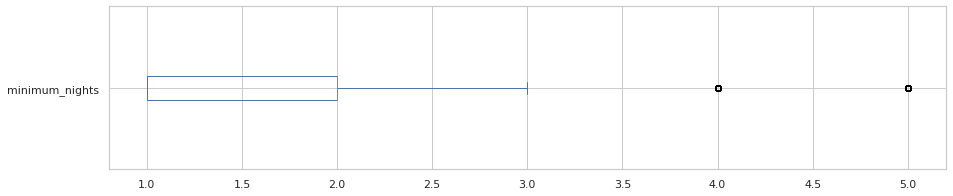

In [194]:
df_clean_iqr.minimum_nights.plot(
    kind="box",
    vert=False,
    figsize=(15, 3)
)
plt.show()

Looking at the data in these last graphs we can see that the distribution is more consistent and without apparent ***oultiers*** 

## Correlation between variables
Correlation is a statistical association that aims to demonstrate the degree to which a pair of variables can be linearly related. If two variables have a positive correlation, it means that an increase in one is followed by an increase in the other. The reverse is true, so a negative correlation means that a decrease in one variable is followed by an increase in the other. And when the correlation value is zero, we can infer that there is no linear correlation between the variables. So we will:
* Create a correlation matrix
* Generate a heatmap from this array, using the seaborn library

### ***Heatmap***

In [195]:
correlation = df_clean_iqr[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
display(correlation)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.030399,-0.146820,-0.196734,-0.130144,0.131755
minimum_nights,0.030399,1.000000,0.011848,-0.143107,-0.102544,-0.141017
number_of_reviews,-0.146820,0.011848,1.000000,0.668864,0.052825,0.016875
reviews_per_month,-0.196734,-0.143107,0.668864,1.000000,0.171518,0.115190
calculated_host_listings_count,-0.130144,-0.102544,0.052825,0.171518,1.000000,0.108116
availability_365,0.131755,-0.141017,0.016875,0.115190,0.108116,1.000000


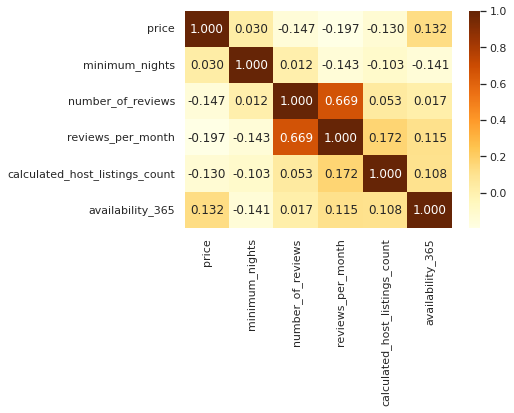

In [196]:
sns.heatmap(correlation, cmap='YlOrBr', fmt='.3f', annot=True);

The biggest correlation we found is between `reviews_per_month` and `number_of_reviews`, probably due to the very nature of the variables. Could be noted that there aren't a strong relationship betweewn `price` and `number_of_reviews`.

## Most rented property type on Airbnb
Once the ***dataset*** has been dealt with, let's check which types of properties are most rented in Porto, Portugal


In [197]:
df_clean_iqr.room_type.value_counts()

Entire home/apt    7522
Private room       1771
Hotel room          132
Shared room          78
Name: room_type, dtype: int64

In [198]:
(df_clean_iqr.room_type.value_counts() / df_clean_iqr.shape[0]) * 100

Entire home/apt    79.153951
Private room       18.636220
Hotel room          1.389035
Shared room         0.820793
Name: room_type, dtype: float64

Then we could say that the vast majority, precisely 78%, of rentals are for entire houses/apartments.

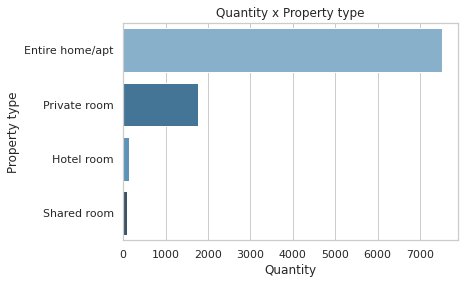

In [199]:
fig, ax = plt.subplots()

sns.set(style="whitegrid", color_codes=True)
data = df_clean_iqr.groupby("room_type").size() 
palette = sns.color_palette("Blues_d", len(data))
rank = data.argsort().argsort() 

ax2 = sns.barplot(
    x=df_clean_iqr.room_type.value_counts().values,
    y=df_clean_iqr.room_type.value_counts().index,
    palette=np.array(palette[::-1])[rank],
    ax=ax
)
ax2.set_xlabel('Quantity')
ax2.set_ylabel('Property type')
ax2.set_title("Quantity x Property type");

## Price and location

Now let's visualize the rental values by location, looking at the most expensive region, the averages and the cheapest.

### Observing prices
It's useful to take the latitude and longitude variables available in this dataset to observe properties prices distribuition by region

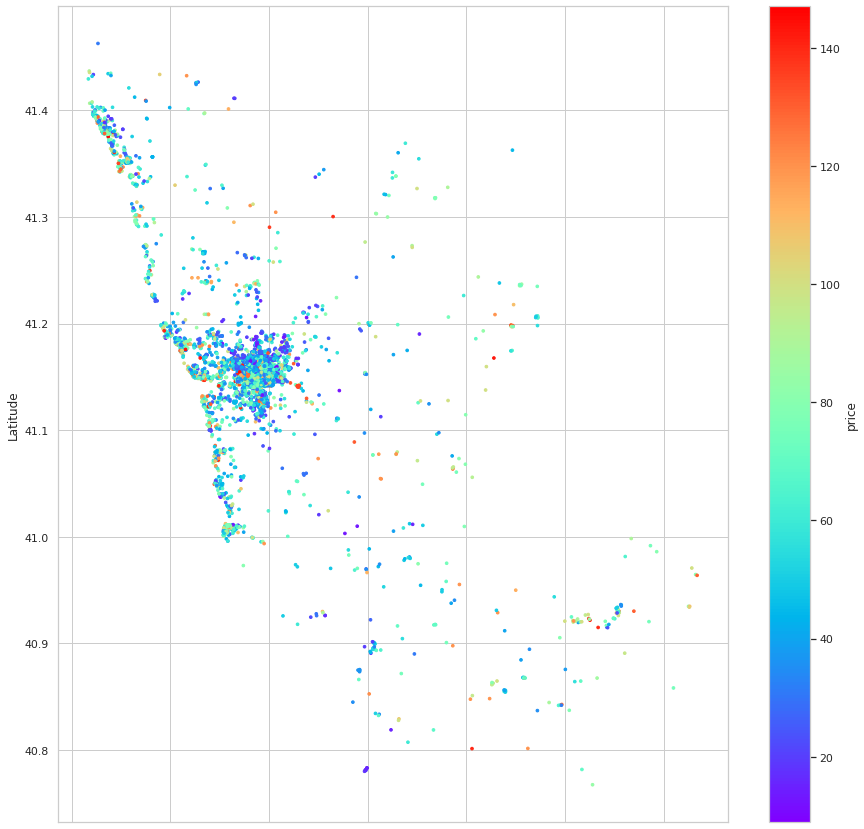

In [200]:
df_clean_iqr.plot.scatter(    
    x='longitude',
    xlabel="Longitude",
    y='latitude',
    ylabel="Latitude",
    c='price',    
    s=7,
    cmap=cm.rainbow,
    figsize=(15,15)
);

Through this plot we could confirm that higher number properties are located at center of the district, and the highest rents appear to be evenly distributed across the city

In [201]:
df_clean.neighbourhood.value_counts()

Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, Vitória    5052
Bonfim                                                   979
Santa Marinha e São Pedro da Afurada                     519
Paranhos                                                 382
Lordelo do Ouro e Massarelos                             356
                                                        ... 
Gião                                                       1
Covelo de Paivó e Janarde                                  1
Vilela                                                     1
São Roque                                                  1
Guilhabreu                                                 1
Name: neighbourhood, Length: 149, dtype: int64

This scatter plot corroborates with price boxplot, showing a high number of properties rents costs beetwen 20 and 80.
Looking at the Porto map, it's noted that majorie of properties are located next to the beach and Porto's downtown.

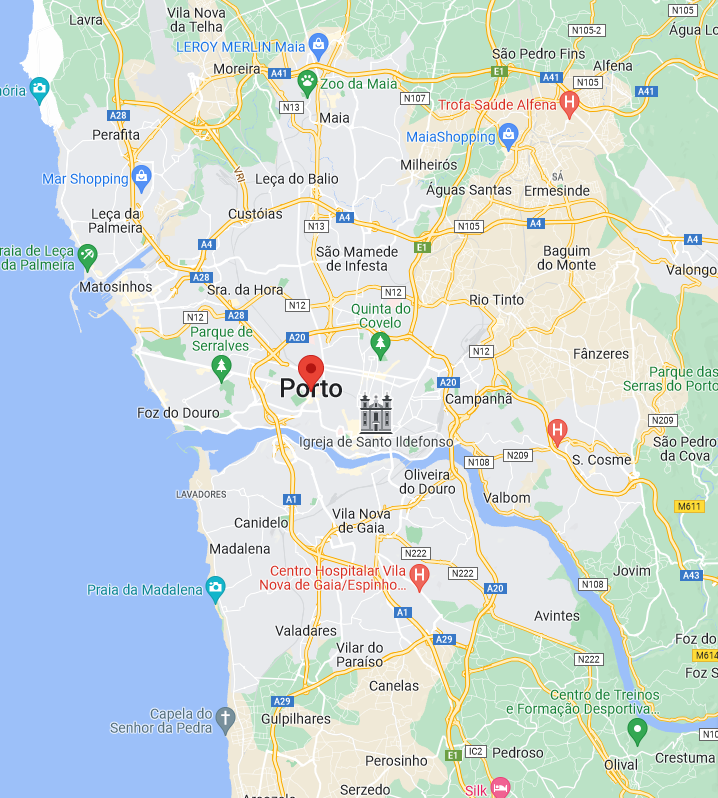

### Costly immobile by region
Top 10 of the most expensive properties by regions

In [202]:
df_clean_iqr.groupby('neighbourhood').agg({'price': 'max'}).sort_values('price', ascending=False)[:10]

,price
neighbourhood,
Bonfim,147
"Aldoar, Foz do Douro e Nevogilde",147
Paranhos,146
Santa Marinha e São Pedro da Afurada,146
"Póvoa de Varzim, Beiriz e Argivai",146
"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, Vitória",146
Matosinhos e Leça da Palmeira,145
Lordelo do Ouro e Massarelos,145
Vila do Conde,145


As we saw on scatter plot, the expensives places are located next to center of Porto, especially next to the river Douro or next to the beach

In [203]:
places = [
    *df_clean_iqr.groupby('neighbourhood').agg({'price': 'max'}).sort_values('price')[:10].index
]
df_expensive_places = df_clean_iqr.loc[df_clean_iqr.neighbourhood.isin(places)]
print(f'Top 10 expensive entries: {df_expensive_places.shape[0]}')

df_expensive_entries = df_clean_iqr.loc[df_clean_iqr.price >= 144]
print(f'Total entries with price higher then 144: {df_expensive_entries.shape[0]}')

expensive_regions = [*df_expensive_entries.neighbourhood.unique()]
print(f"\nNeighbourhoods offering this prices: {len(expensive_regions)}\n")

for i, region in enumerate(expensive_regions, start=1):
    print(f"{i}. {region}")


Top 10 expensive entries: 13
Total entries with price higher then 144: 32

Neighbourhoods offering this prices: 10

1. Espinho
2. Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, Vitória
3. Bonfim
4. Santa Marinha e São Pedro da Afurada
5. Vila do Conde
6. Aldoar, Foz do Douro e Nevogilde
7. Lordelo do Ouro e Massarelos
8. Matosinhos e Leça da Palmeira
9. Paranhos
10. Póvoa de Varzim, Beiriz e Argivai


### Expensive and cheap areas
An expensive area may not have the more costly properties, but the average price of the area are high

In [204]:
df_clean_iqr.groupby('neighbourhood').agg({'price': 'median'}).sort_values('price', ascending=False)[:10]

,price
neighbourhood,
São Pedro de Castelões,140.0
Covelas,139.0
Parada de Todeia,121.5
Junqueira,120.0
Muro,120.0
Mansores,114.0
Guilhabreu,111.0
Alvarelhos e Guidões,110.0
"Vila Chã, Codal e Vila Cova de Perrinho",108.0


As we could see Paços de Brandão is the expensive area of Porto in average, even though it hasn't any top 10 costly property

In this context, the opposite can also be true, so let's check the region with the lowest cost of property rental and check the cheapest regions

In [205]:
df_clean_iqr.groupby('neighbourhood').agg({'price': 'mean'}).sort_values('price')[:10]

,price
neighbourhood,
Sanguedo,13.000000
Gandra,16.000000
"Pinheiro da Bemposta, Travanca e Palmaz",23.666667
Baguim do Monte (Rio Tinto),25.000000
Pedrouços,25.500000
Arrifana,27.000000
Estela,31.000000
Nogueira do Cravo e Pindelo,31.000000
Bougado (São Martinho e Santiago),34.333333


Looking at the results it's astonishing having rents cheaper than 30 and manually checking this places in Airbnb these properties seems to be real. But there is not many properties in these top.

In [206]:
places = [
    *df_clean_iqr.groupby('neighbourhood').agg({'price': 'mean'}).sort_values('price')[:10].index
]
df_cheapest_places = df_clean_iqr.loc[df_clean_iqr.neighbourhood.isin(places)]
print(f'Top 10 cheapest entries: {df_cheapest_places.shape[0]}')

df_cheapest_entries = df_clean_iqr.loc[df_clean_iqr.price <= 35]
print(f'Total entries with price lower then 35: {df_cheapest_entries.shape[0]}')

cheapest_regions = [*df_cheapest_entries.neighbourhood.unique()]
print(f"\nNeighbourhoods offering this prices: {len(cheapest_regions)}\n")
for i, region in enumerate(cheapest_regions, start=1):
    print(f"{i}. {region}")


Top 10 cheapest entries: 30
Total entries with price lower then 35: 1852

Neighbourhoods offering this prices: 73

1. Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, Vitória
2. Campanhã
3. Santa Marinha e São Pedro da Afurada
4. Fornelo e Vairão
5. Gulpilhares e Valadares
6. Oliveira do Douro
7. Ramalde
8. Aldoar, Foz do Douro e Nevogilde
9. Pedrouços
10. Mafamude e Vilar do Paraíso
11. São Mamede de Infesta e Senhora da Hora
12. O. Azeméis, Riba-Ul, Ul, Macinhata da Seixa, Madail
13. Bonfim
14. Vila do Conde
15. Madalena
16. Espinho
17. Paranhos
18. Lordelo do Ouro e Massarelos
19. Matosinhos e Leça da Palmeira
20. Perafita, Lavra e Santa Cruz do Bispo
21. Póvoa de Varzim, Beiriz e Argivai
22. Arcozelo
23. Castêlo da Maia
24. Fânzeres e São Pedro da Cova
25. Canidelo
26. Aguçadoura e Navais
27. Chave
28. Pedroso e Seixezelo
29. Cidade da Maia
30. Ermesinde
31. Arouca e Burgo
32. Gondomar (São Cosme), Valbom e Jovim
33. Santa Maria da Feira, Travanca, Sanfins e Espargo
34. Caldas de São J

### Price comparison by region

Sorting in descending order of the highest value, let's compare the rental max, mean and min values distribution by region 

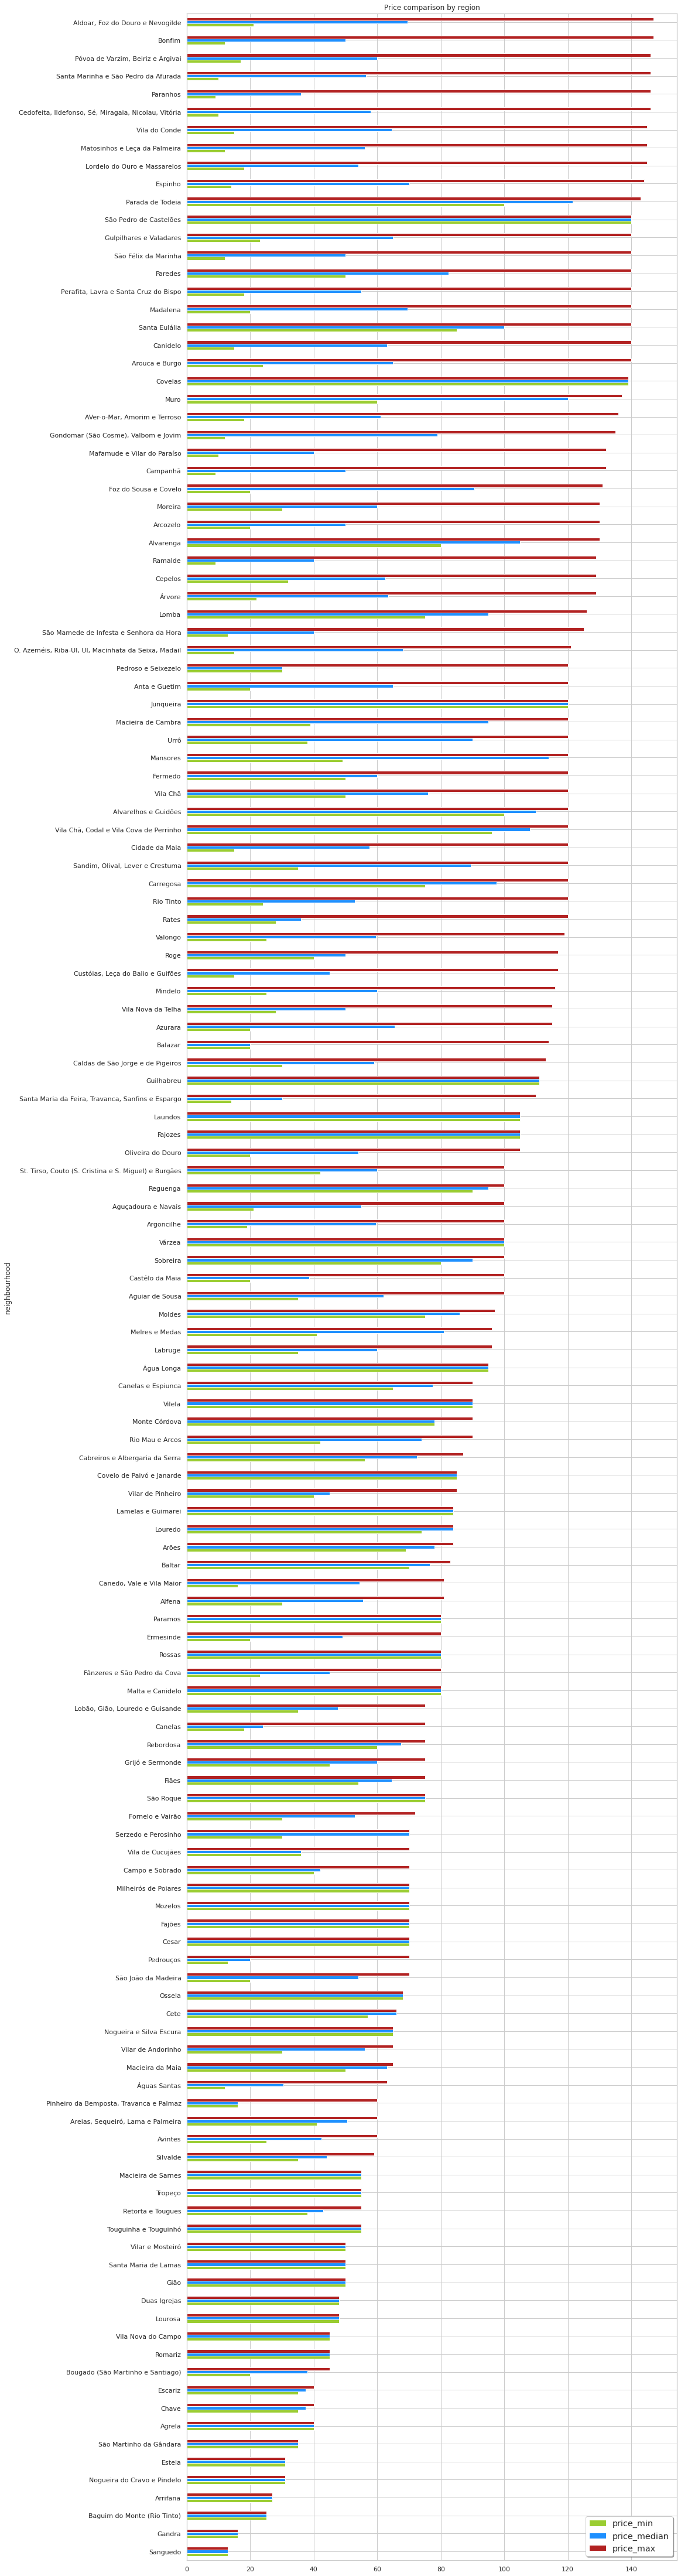

In [207]:
df_price_grouped = df_clean_iqr.groupby('neighbourhood').agg(
    price_min=('price', np.min),    
    price_median=('price', np.median),
    price_max=('price', np.max)
)
df_price_grouped.sort_values('price_max').plot.barh(
    title="Price comparison by region",
    figsize=(15, 80),
    color={
        'price_min':'yellowgreen',
        'price_median':'dodgerblue',
        'price_max':'firebrick'
    }
)
plt.legend(
    title_fontsize="large",
    loc="best",
    fontsize="large",
    shadow=True
)
plt.show()

## Average minimum nights to rent


Let's see the min, median, and max values of minimum nights to rent. Despite that as the outliers cross-cut was 3 it probably we won't have a meaningful insight

In [208]:
print(f'Min of nights to rent: {df_clean_iqr.minimum_nights.min()}.')
print(f'Median of nights to rent: {df_clean_iqr.minimum_nights.median():.0f}.')
print(f'Max of nights to rent: {df_clean_iqr.minimum_nights.max()}.')

Min of nights to rent: 1.
Median of nights to rent: 2.
Max of nights to rent: 5.


Now we will analise the minimum number of nights required to rent

In [209]:
df_clean_iqr.groupby('neighbourhood').agg({'minimum_nights': np.mean}).sort_values('minimum_nights', ascending = False)

,minimum_nights
neighbourhood,
Sanguedo,5.0
"Lobão, Gião, Louredo e Guisande",4.2
Covelas,4.0
Duas Igrejas,4.0
Santa Maria de Lamas,4.0
...,...
Agrela,1.0
Balazar,1.0
Cesar,1.0


The nature of the variable `minimum_nights` in this context, especially after cleaning the outliers, has a small range of values. It's quite risky to try extract any insight with it

# Conclusions


Exploratory analysis is a good way to start,because it gives us a sense of how to interpret the data and experiment different approaches. However, we cannot just cling to it, in this context we found that the use of the IQR Score was of great value to eliminate outliers.

Through this analysis we realized that it is possible to rent properties that are extremely well located in the city center without paying so much for it, as the variety and concentration of rentals close to the center is interesting. It is possible to find properties that vary between 30 and 140 very close to each other.

The city of Porto is a great place to walk around, extremely inviting and with a very interesting history. Combined with good planning, we have seen that it is possible to enjoy convenience at a low price by renting interesting properties in Airbnb.